In [7]:
from general_parser.loaders import dataset_loader
loader = dataset_loader("/Users/rafiqmazen/AMR-eval/AMR/LP/full.txt")
amrs = loader.return_amr_text(loader.return_amrs())


[amr] Loading AMRs from file: /Users/rafiqmazen/AMR-eval/AMR/LP/full.txt
[amr] Loading AMRs from file: /Users/rafiqmazen/AMR-eval/AMR/LP/full.txt


In [2]:
from general_parser.models import ScriptGeneratorModel
parser = ScriptGeneratorModel(model_path = "/Users/rafiqmazen/GR/StructAdapt",
                              predict_script = "/test.sh t5-base",
                              checkpoint_path = "/Users/rafiqmazen/GR/notebooks/models-ckpt/structadapt/ckpt_amr2020"
                              )

In [ ]:
amr_pred = []
for sent in loader.sentences:
    amr_pred.append(parser.parse_amr(sent,plot=False))

In [3]:
amr_pred = parser.predict(amrs)

Error running shell script: Command '['sh', '/Users/rafiqmazen/GR/StructAdapt/test.sh', 't5-base', '/Users/rafiqmazen/GR/notebooks/models-ckpt/structadapt/ckpt_amr2020', '/Users/rafiqmazen/GR/StructAdapt/dataset.txt', '0']' returned non-zero exit status 2.


In [4]:
amr_pred

2

In [ ]:
amr_pred = parser.parse_amr_batches(loader.sentences)

In [1]:
import pandas as pd
preds = pd.read_csv("spring_preds.txt", delimiter="|", header=None, names=["sent"])

In [2]:
import ast
preds["sent"] = [ast.literal_eval(x)[0] for x in preds["sent"]]

In [32]:
preds

,sent
0,Chapter 1
1,"I once saw a magnificent picture in ""true stor..."
2,"It was a picture of a constrictor boa, swallow..."
3,Here's a copy of the drawing.
4,"The boa, the book says, swallowed its whole pr..."
...,...
1557,"And if you come upon this spot, please don't h..."
1558,Wait a time and you'll be exactly under the star.
1559,If then a little man appeared with golden hair...
1560,Please comfort me in this.


In [14]:

import general_parser.evaluation.evaluation
from importlib import reload
reload(general_parser.evaluation.evaluation)
from general_parser.evaluation.evaluation import eval_bottom_up, eval_top_down, eval_at_each_level, plot_smatch, plot_buckets, evaluate_AMRs

In [4]:
reload(general_parser.evaluation.evaluation)

<module 'general_parser.evaluation.evaluation' from '/Users/rafiqmazen/AMR-eval/notebooks/general_parser/evaluation/evaluation.py'>

In [5]:
evaluate_AMRs(preds=amr_pred,gold=loader.text_amrs)

NameError: name 'amr_pred' is not defined

In [19]:
r.to_csv("gen lp.csv")

In [15]:
r = eval_bottom_up(preds["sent"],loader.sentences, loader.sentences, evaluation_mode="text",evaluation_function="bleu")
#plot_smatch(r, "bottom up SPRING")
#plot_buckets(r,"bottom up SPRING")


max number of tokens: 2 number of entries: 3
BLEU score:  0.00
 
max number of tokens: 3 number of entries: 69
BLEU score: 65.59
 
max number of tokens: 4 number of entries: 111
BLEU score: 56.03
 
max number of tokens: 5 number of entries: 190
BLEU score: 58.98
 
max number of tokens: 6 number of entries: 272
BLEU score: 61.15
 
max number of tokens: 7 number of entries: 389
BLEU score: 62.45
 
max number of tokens: 8 number of entries: 493
BLEU score: 62.52
 
max number of tokens: 9 number of entries: 585
BLEU score: 63.07
 
max number of tokens: 10 number of entries: 690
BLEU score: 63.07
 
max number of tokens: 11 number of entries: 791
BLEU score: 62.65
 
max number of tokens: 12 number of entries: 878


/Users/rafiqmazen/.local/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/rafiqmazen/.local/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


BLEU score: 62.43
 
max number of tokens: 13 number of entries: 963
BLEU score: 62.66
 
max number of tokens: 14 number of entries: 1029
BLEU score: 62.96
 
max number of tokens: 15 number of entries: 1085
BLEU score: 62.91
 
max number of tokens: 16 number of entries: 1131
BLEU score: 63.10
 
max number of tokens: 17 number of entries: 1181
BLEU score: 62.85
 
max number of tokens: 18 number of entries: 1225
BLEU score: 62.91
 
max number of tokens: 19 number of entries: 1264
BLEU score: 62.83
 
max number of tokens: 20 number of entries: 1296
BLEU score: 62.79
 
max number of tokens: 21 number of entries: 1321
BLEU score: 62.83
 
max number of tokens: 22 number of entries: 1353
BLEU score: 62.77
 
max number of tokens: 23 number of entries: 1379
BLEU score: 62.76
 
max number of tokens: 24 number of entries: 1407
BLEU score: 62.81
 
max number of tokens: 25 number of entries: 1421
BLEU score: 62.83
 
max number of tokens: 26 number of entries: 1435
BLEU score: 62.80
 
max number of t

min number of tokens: 101 number of entries: 1
BLEU score: 43.11
 
min number of tokens: 70 number of entries: 2
BLEU score: 46.94
 
min number of tokens: 63 number of entries: 3
BLEU score: 47.03
 
min number of tokens: 58 number of entries: 4
BLEU score: 50.66
 
min number of tokens: 55 number of entries: 5
BLEU score: 51.30
 
min number of tokens: 53 number of entries: 7
BLEU score: 51.08
 
min number of tokens: 52 number of entries: 8
BLEU score: 53.43
 
min number of tokens: 51 number of entries: 10
BLEU score: 55.17
 
min number of tokens: 50 number of entries: 12
BLEU score: 53.67
 
min number of tokens: 49 number of entries: 14
BLEU score: 54.94
 
min number of tokens: 48 number of entries: 17
BLEU score: 56.09
 
min number of tokens: 47 number of entries: 19
BLEU score: 56.81
 
min number of tokens: 45 number of entries: 21
BLEU score: 58.40
 
min number of tokens: 44 number of entries: 23
BLEU score: 59.40
 
min number of tokens: 42 number of entries: 26
BLEU score: 59.52
 
m

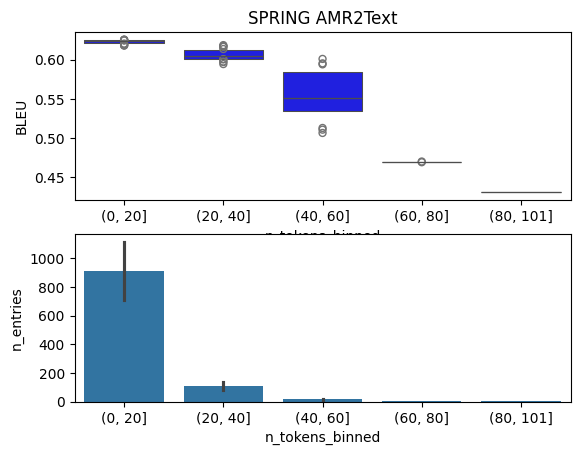

<Figure size 10000x12000 with 0 Axes>

In [17]:
r = eval_top_down(preds["sent"],loader.sentences, loader.sentences,  evaluation_mode="text",evaluation_function="bleu")
#plot_smatch(r, "top down SPRING")
plot_buckets(r,"SPRING AMR2Text")

number of tokens: 101 number of entries: 1
BLEU score: 43.11
 
number of tokens: 70 number of entries: 1
BLEU score: 52.51
 
number of tokens: 63 number of entries: 1
BLEU score: 47.24
 
number of tokens: 58 number of entries: 1
BLEU score: 65.12
 
number of tokens: 55 number of entries: 1
BLEU score: 53.38
 
number of tokens: 53 number of entries: 2
BLEU score: 50.31
 
number of tokens: 52 number of entries: 1
BLEU score: 70.54
 
number of tokens: 51 number of entries: 2
BLEU score: 62.80
 
number of tokens: 50 number of entries: 2
BLEU score: 43.62
 
number of tokens: 49 number of entries: 2
BLEU score: 64.48
 
number of tokens: 48 number of entries: 3
BLEU score: 62.17
 
number of tokens: 47 number of entries: 2
BLEU score: 62.89
 
number of tokens: 45 number of entries: 2
BLEU score: 74.34
 
number of tokens: 44 number of entries: 2
BLEU score: 71.73
 
number of tokens: 42 number of entries: 3
BLEU score: 60.73
 
number of tokens: 41 number of entries: 3
BLEU score: 66.00
 
number 

/Users/rafiqmazen/.local/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Users/rafiqmazen/.local/lib/python3.9/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


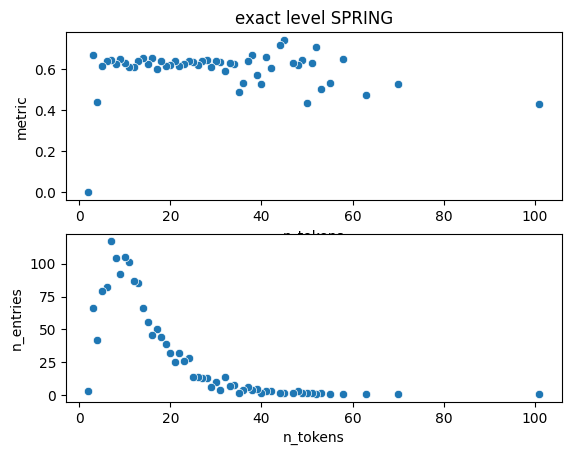

<Figure size 10000x12000 with 0 Axes>

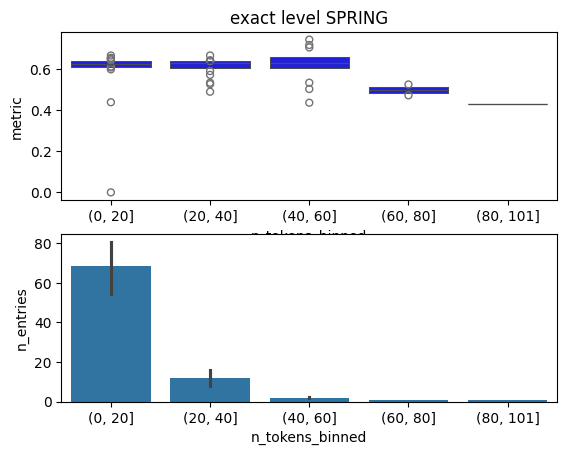

<Figure size 10000x12000 with 0 Axes>

In [24]:
r = eval_at_each_level(preds["sent"],loader.sentences, loader.sentences,  evaluation_mode="text",evaluation_function="bleu")
plot_smatch(r, "exact level SPRING")
plot_buckets(r,"exact level SPRING")

In [ ]:
from amrlib.evaluate.smatch_enhanced import compute_scores, compute_smatch

In [ ]:
from general_parser.evaluation.evaluation import eval_bottom_up

r=eval_bottom_up(amr_pred,loader.amr_texts, loader.sentences, evaluation_function="smatch")

In [ ]:
r.dtypes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")



ax = sns.scatterplot(
    results, x="n_tokens", y="f1", legend="full"
)
sns.scatterplot(
    results, x="n_tokens", y="recall", legend="full"
)
sns.scatterplot(
    results, x="n_tokens", y="precision", legend="full"
)

In [ ]:

fig,ax = plt.subplots()
plt.figure(figsize=(100,60))
p = so.Plot(r,x='n_tokens',y='f1', color='n_entries').add(so.Dot(marker='.'))
p.on(ax).show()
g.on(ax).show()

In [ ]:
sns.scatterplot(x='n_tokens', y='value', hue='variable', 
             data=pd.melt(r[["f1","recall","precision","n_tokens"]], ['n_tokens']))

In [ ]:
results["precision"] = [x[0] for x in results["metrics"]]
results["recall"] = [x[1] for x in results["metrics"]]
results["f1"] = [x[2] for x in results["metrics"]]



In [ ]:
r

In [1]:

from amrlib.evaluate.smatch_enhanced import compute_scores, get_entries, compute_smatch
from amrlib.evaluate.bleu_scorer import BLEUScorer
from nltk.tokenize import word_tokenize
import pandas as pd
import seaborn.objects as so
import matplotlib.pyplot as plt
import seaborn as sns


def evaluate_text_bleu(ref, hyp):
    bleu_scorer = BLEUScorer()
    bleu_score, ref_len, hyp_len = bleu_scorer.compute_bleu(ref, hyp)
    print('BLEU score: %5.2f' % (bleu_score*100.))
    return bleu_score

In [5]:
evaluate_text_bleu(["sara is nice", "rafiq is cool"],["nice sara", "cool rafiq"],)

BLEU score: 47.26


0.47263127614238293